## Approach
This notebook analyze the house price in **New York City** during 2020-01-01 to 2024-04-30 by month. 
The goal is to 
- First, understand the relationship between the listing price and sale price. 
- Second, understand the accuracy of the datasets themselves.

Below is the process to achieve the objectives:
- We collect market price data from two sources: a publicly available data in **kaggle** and crawled data from **Parcllabs API**. We preprocessed the raw data for the monthly market data of New York City during 2020-01-01 to 2024-04-30. Specifically we got the **median sale price** data and **median list price** data of four market types: **single family**, **condo**, **townhouse**, **all** from both data sources. The data processing scripts can be found in other files.
- We analyze the listing price and sold price relationship for the data collected.
- We cross check the listing and sold prices of both datasets and conjecture their accuracy.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from functools import reduce

In [2]:
kaggle_single_family = pd.read_csv('kaggle_ny_data_single_family.csv')[['period_begin', 'period_end', 'median_sale_price', 'median_list_price']]
parcl_single_family = pd.read_csv('results_housing_event_prices_single_family.csv', index_col=0)[['date', 'price_median_sales', 'price_median_new_listings_for_sale']]

kaggle_single_family = kaggle_single_family.rename(columns={'median_sale_price': 'kaggle_median_sale_price_single_fam', 'median_list_price': 'kaggle_median_list_price_single_fam'})
parcl_single_family = parcl_single_family.rename(columns={'date': 'period_begin', 'price_median_sales': 'parcl_median_sale_price_single_fam', 'price_median_new_listings_for_sale': 'parcl_median_list_price_single_fam'})

df_single_family = pd.merge(kaggle_single_family, parcl_single_family, on='period_begin', how='outer').sort_values('period_begin')

In [3]:
df_single_family

,period_begin,period_end,kaggle_median_sale_price_single_fam,kaggle_median_list_price_single_fam,parcl_median_sale_price_single_fam,parcl_median_list_price_single_fam
0,2020-01-01,2020-01-31,624000.0,779700.0,610000,729500
1,2020-02-01,2020-02-29,610000.0,750000.0,610000,799000
2,2020-03-01,2020-03-31,649000.0,750000.0,634000,829000
3,2020-04-01,2020-04-30,631000.0,746000.0,620000,769000
4,2020-05-01,2020-05-31,615000.0,749999.0,630000,829000
5,2020-06-01,2020-06-30,626500.0,775000.0,629000,891944
6,2020-07-01,2020-07-31,627500.0,769000.0,605000,850000
7,2020-08-01,2020-08-31,615000.0,766250.0,600000,869500
8,2020-09-01,2020-09-30,636500.0,799000.0,600000,834999
9,2020-10-01,2020-10-31,644250.0,779450.0,635000,898500


In [4]:
kaggle_condo = pd.read_csv('kaggle_ny_data_condo.csv')[['period_begin', 'period_end', 'median_sale_price', 'median_list_price']]
parcl_condo = pd.read_csv('results_housing_event_prices_condo.csv', index_col=0)[['date', 'price_median_sales', 'price_median_new_listings_for_sale']]

kaggle_condo = kaggle_condo.rename(columns={'median_sale_price': 'kaggle_median_sale_price_condo', 'median_list_price': 'kaggle_median_list_price_condo'})
parcl_condo = parcl_condo.rename(columns={'date': 'period_begin', 'price_median_sales': 'parcl_median_sale_price_condo', 'price_median_new_listings_for_sale': 'parcl_median_list_price_condo'})

df_condo = pd.merge(kaggle_condo, parcl_condo, on='period_begin', how='outer').sort_values('period_begin')

In [5]:
df_condo 

,period_begin,period_end,kaggle_median_sale_price_condo,kaggle_median_list_price_condo,parcl_median_sale_price_condo,parcl_median_list_price_condo
0,2020-01-01,2020-01-31,722500.0,779700.0,691595,1195000
1,2020-02-01,2020-02-29,699999.5,750000.0,690187,1059253
2,2020-03-01,2020-03-31,724650.0,750000.0,702592,1030000
3,2020-04-01,2020-04-30,800000.0,746000.0,731570,1202500
4,2020-05-01,2020-05-31,715000.0,749999.0,962500,1150000
5,2020-06-01,2020-06-30,680000.0,775000.0,702500,999500
6,2020-07-01,2020-07-31,655000.0,769000.0,655000,1049076
7,2020-08-01,2020-08-31,642500.0,766250.0,657500,992500
8,2020-09-01,2020-09-30,690000.0,799000.0,633000,1225000
9,2020-10-01,2020-10-31,695000.0,779450.0,671000,1298000


In [6]:
kaggle_townhouse = pd.read_csv('kaggle_ny_data_townhouse.csv')[['period_begin', 'period_end', 'median_sale_price', 'median_list_price']]
parcl_townhouse = pd.read_csv('results_housing_event_prices_townhouse.csv', index_col=0)[['date', 'price_median_sales', 'price_median_new_listings_for_sale']]

kaggle_townhouse = kaggle_townhouse.rename(columns={'median_sale_price': 'kaggle_median_sale_price_townhouse', 'median_list_price': 'kaggle_median_list_price_townhouse'})
parcl_townhouse = parcl_townhouse.rename(columns={'date': 'period_begin', 'price_median_sales': 'parcl_median_sale_price_townhouse', 'price_median_new_listings_for_sale': 'parcl_median_list_price_townhouse'})

df_townhouse = pd.merge(kaggle_townhouse, parcl_townhouse, on='period_begin', how='outer').sort_values('period_begin')

In [7]:
df_townhouse

,period_begin,period_end,kaggle_median_sale_price_townhouse,kaggle_median_list_price_townhouse,parcl_median_sale_price_townhouse,parcl_median_list_price_townhouse
0,2020-01-01,2020-01-31,749500.0,779700.0,522500,800000
1,2020-02-01,2020-02-29,781750.0,750000.0,783050,1200000
2,2020-03-01,2020-03-31,750000.0,750000.0,642500,824500
3,2020-04-01,2020-04-30,795000.0,746000.0,520000,1150000
4,2020-05-01,2020-05-31,765000.0,749999.0,715000,1450000
5,2020-06-01,2020-06-30,822500.0,775000.0,502500,669000
6,2020-07-01,2020-07-31,810000.0,769000.0,471500,847220
7,2020-08-01,2020-08-31,860000.0,766250.0,525000,998000
8,2020-09-01,2020-09-30,780000.0,799000.0,450000,864500
9,2020-10-01,2020-10-31,750000.0,779450.0,657500,1176500


In [8]:
kaggle_all = pd.read_csv('kaggle_ny_data_all_residential.csv')[['period_begin', 'period_end', 'median_sale_price', 'median_list_price']]
parcl_all = pd.read_csv('results_housing_event_prices_all_properties.csv', index_col=0)[['date', 'price_median_sales', 'price_median_new_listings_for_sale']]

kaggle_all = kaggle_all.rename(columns={'median_sale_price': 'kaggle_median_sale_price_all', 'median_list_price': 'kaggle_median_list_price_all'})
parcl_all = parcl_all.rename(columns={'date': 'period_begin', 'price_median_sales': 'parcl_median_sale_price_all', 'price_median_new_listings_for_sale': 'parcl_median_list_price_all'})

df_all = pd.merge(kaggle_all, parcl_all, on='period_begin', how='outer').sort_values('period_begin')

In [9]:
df_all

,period_begin,period_end,kaggle_median_sale_price_all,kaggle_median_list_price_all,parcl_median_sale_price_all,parcl_median_list_price_all
0,2020-01-01,2020-01-31,725000.0,779700.0,670500,989999
1,2020-02-01,2020-02-29,725000.0,750000.0,680000,998000
2,2020-03-01,2020-03-31,725000.0,750000.0,690000,999000
3,2020-04-01,2020-04-30,730000.0,746000.0,685000,989500
4,2020-05-01,2020-05-31,720000.0,749999.0,750000,1100000
5,2020-06-01,2020-06-30,700000.0,775000.0,688500,925000
6,2020-07-01,2020-07-31,700000.0,769000.0,651840,977500
7,2020-08-01,2020-08-31,685000.0,766250.0,652495,947500
8,2020-09-01,2020-09-30,705000.0,799000.0,638500,1150000
9,2020-10-01,2020-10-31,716400.0,779450.0,675000,1195000


### Plot 1: Price Comparison, Single Family

We first analyze the **single family** type. The aveage median sale price and listing price of the kaggle dataset are 766913 and 809029. The avarage median sale price and listing price of the parcl dataset are 697911 and 814325 respectively. And the data is ploted below. We can see:
- The trend of listing prices (orange and red line) are similar and has been reletively stable since 2020. The parcllabs listing data fluctuated more in the begining and then slightly below the kaggle data but with a similar trend.
- Both datasets show the sale prices has increased dramatically since mid 2021. The median sale price data that Parcllabs collected is in general around 10K lower than the other dataset.
- As for the relationship of listing and sale price, the sale price was way below the listing price before covid, and came closer since mid 2021.

In [10]:
df_single_family_avg = df_single_family.drop(['period_begin', 'period_end'], axis=1).mean()
df_single_family_avg

kaggle_median_sale_price_single_fam    766913.326923
kaggle_median_list_price_single_fam    809029.817308
parcl_median_sale_price_single_fam     697911.538462
parcl_median_list_price_single_fam     814325.980769
dtype: float64

<Axes: xlabel='period_begin'>

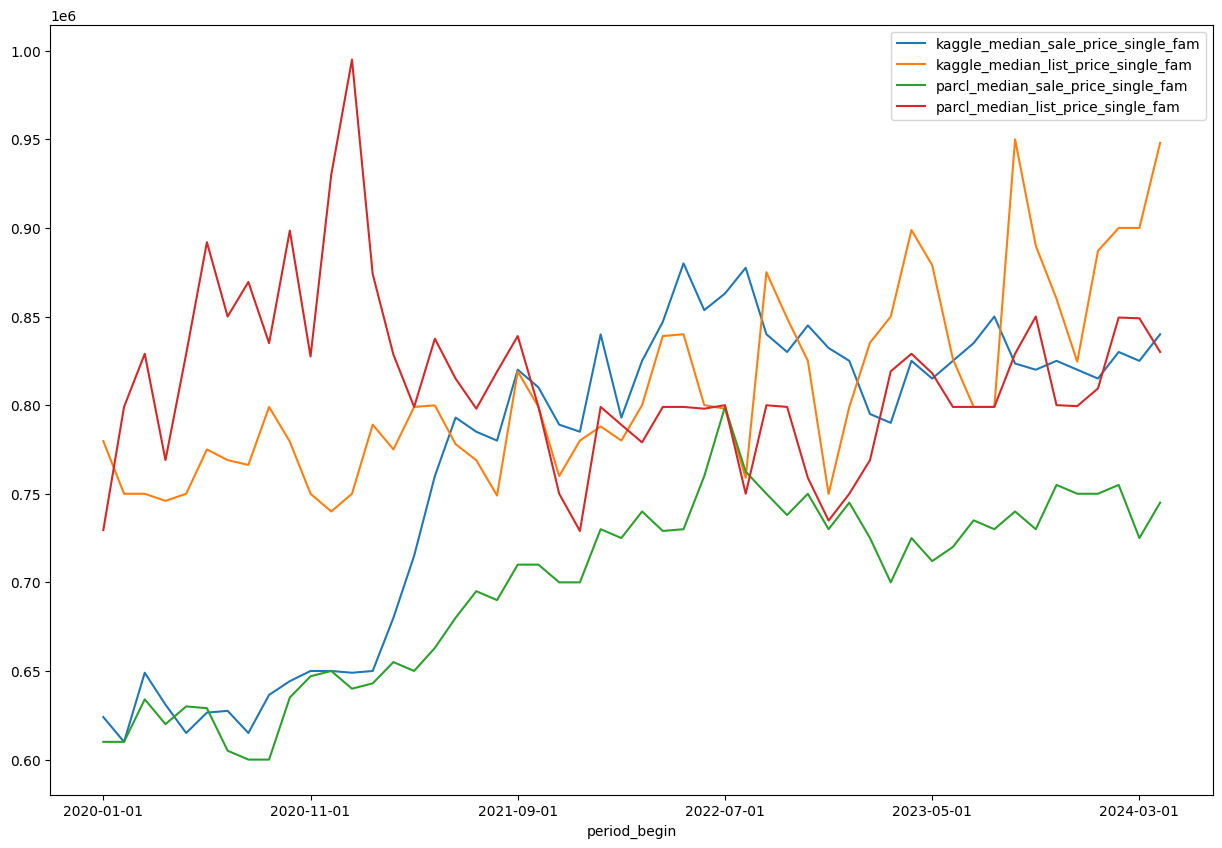

In [11]:
df_single_family.plot(figsize=(15,10), x='period_begin')

### Plot 2: Price Comparison, Condo


We analyze the **condo** type below. The aveage median sale price and listing price of the kaggle dataset are 599885 and 809030. The avarage median sale price and listing price of the parcl dataset are 776760 and 1016527 respectively. The data is ploted below. We can see:
- For Parcllabs dataset, the listing price has been higher than sale price, and the both the prices have dropped. 
- For kaggle dataset, the listing price has been higher than sale price too, but both the listing and sale price slightly increased.
- Again the parcllabs listing data fluctuated more in general.

In [12]:
df_condo_avg = df_condo.drop(['period_begin', 'period_end'], axis=1).mean()
df_condo_avg

kaggle_median_sale_price_condo    5.998853e+05
kaggle_median_list_price_condo    8.090298e+05
parcl_median_sale_price_condo     7.767604e+05
parcl_median_list_price_condo     1.016527e+06
dtype: float64

<Axes: xlabel='period_begin'>

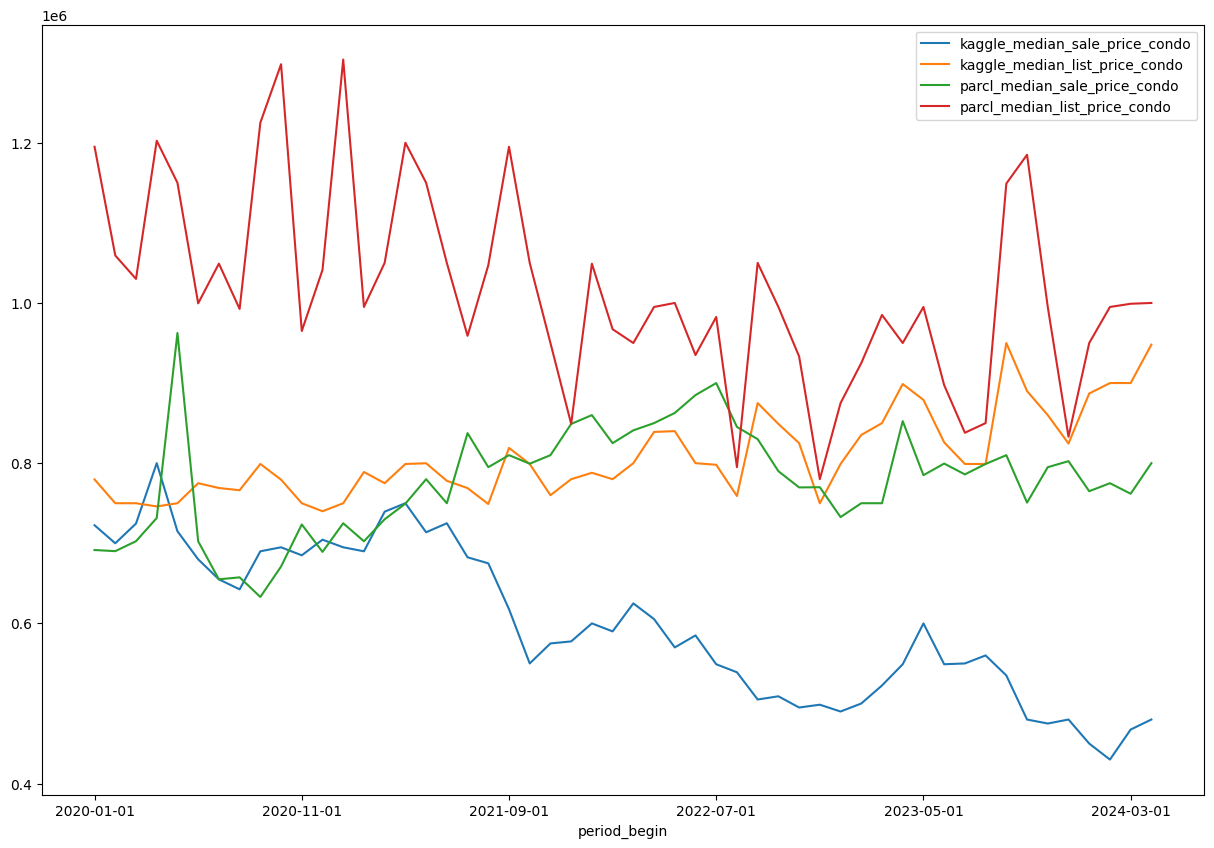

In [13]:
df_condo.plot(figsize=(15,10), x='period_begin')

### Plot 3: Price Comparison, Townhouse

For **townhouse** type below. The aveage median sale price and listing price of the kaggle dataset are 878003 and 809030. The avarage median sale price and listing price of the parcl dataset are 743307 and 101602 respectively. From the plot we can see:
- For Parcllabs dataset, the listing price has been higher than sale price.
- However for kaggle dataset, the sale price(blue) has been higher than listing price(orange).
- Again the parcllabs listing data fluctuated more in general.

In [14]:
df_townhouse_avg = df_townhouse.drop(['period_begin', 'period_end'], axis=1).mean()
df_townhouse_avg

kaggle_median_sale_price_townhouse    8.780029e+05
kaggle_median_list_price_townhouse    8.090298e+05
parcl_median_sale_price_townhouse     7.433070e+05
parcl_median_list_price_townhouse     1.016023e+06
dtype: float64

<Axes: xlabel='period_begin'>

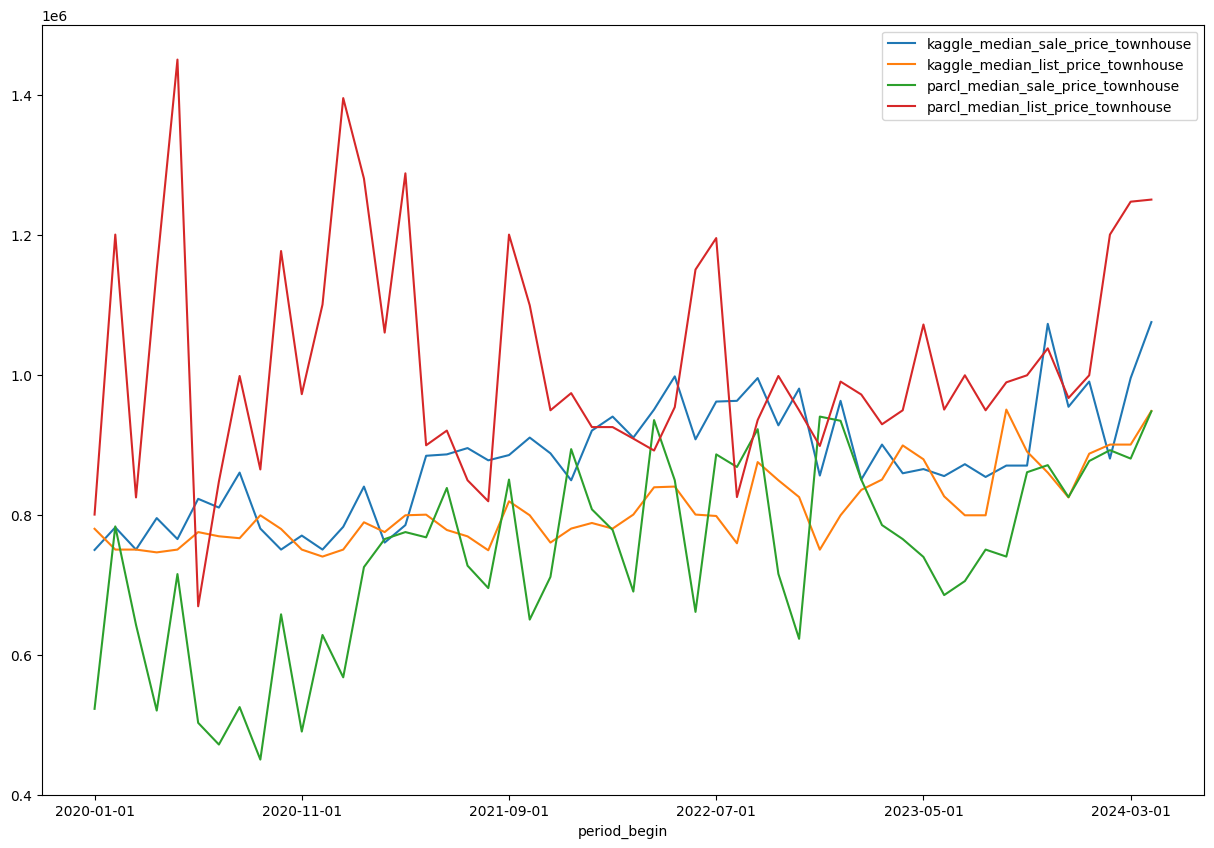

In [15]:
df_townhouse.plot(figsize=(15,10), x='period_begin')

### Plot 4: Price Comparison, All

Finally we look at the overall stats of the both datasets.
- The overall data points are more stable except for the Parcllabs listing line.
- The listing price is higher than sale price in general.
- The sale prices of Parcllabs data and kaggle data agree more with each other in this char.

In [16]:
df_all_avg = df_all.drop(['period_begin', 'period_end'], axis=1).mean()
df_all_avg

kaggle_median_sale_price_all    778943.076923
kaggle_median_list_price_all    809029.817308
parcl_median_sale_price_all     770589.153846
parcl_median_list_price_all     971090.134615
dtype: float64

<Axes: xlabel='period_begin'>

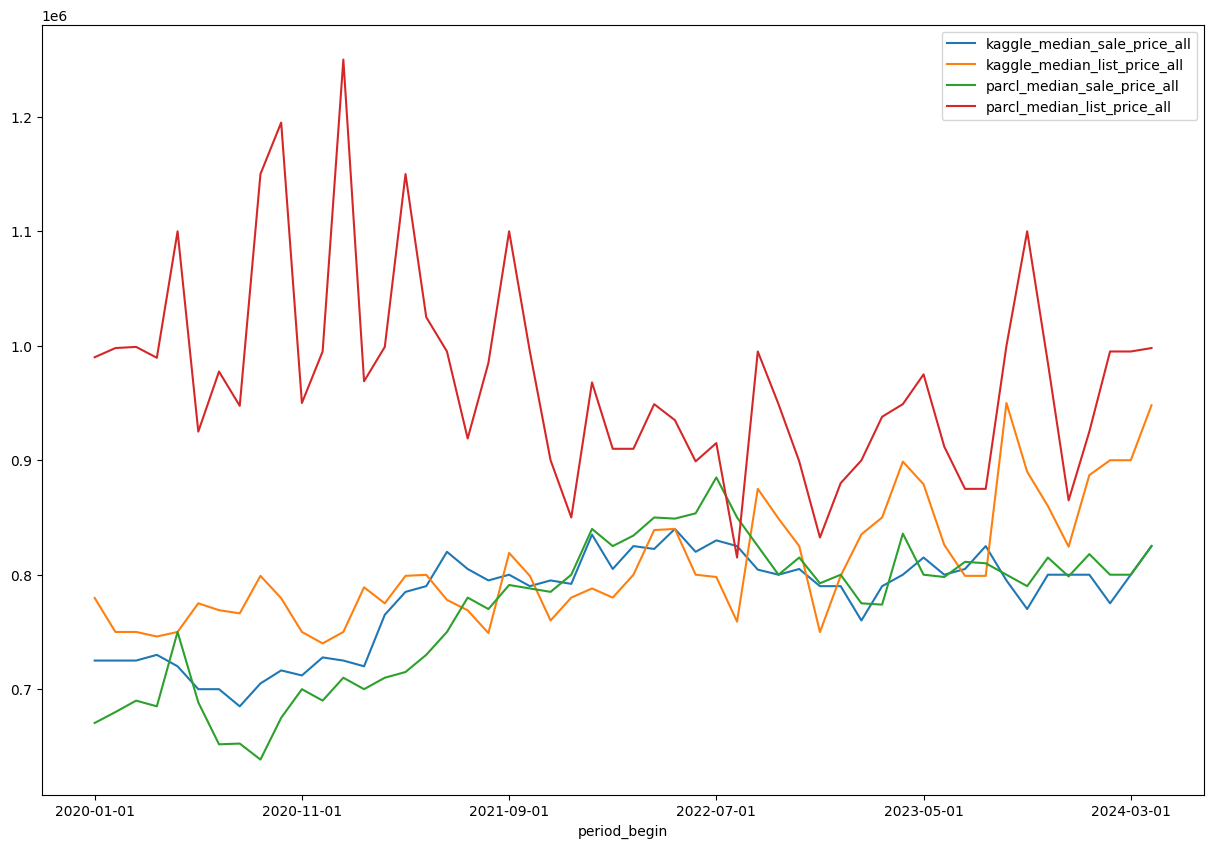

In [17]:
df_all.plot(figsize=(15,10), x='period_begin')

## Takeaways:

Going through the details of the data points collected, my main takeaways are:
- The listing prices are in general higher than the sale price. The gap was larger before covid.
- The Parcllabs data fluctuates more compared with the Kaggle data source, especially the data before mid 2021. I would suspect more the accuracy of Pacllabs data. It needs more in-depth investigation to the detailed transaction data before aggeragation.